In [4]:
import matplotlib.pyplot as plt
def complement(input_char):     #Find the complementary of input nucleotide
    if input_char == "A":
        return "T"
    if input_char == "T":
        return "A"
    if input_char == "C":
        return "G"
    if input_char == "G":
        return "C"
    if input_char == "N":
        return "N"

def reverse_complement(input_string):       #Find the given reverse complementary of the input sequence
    res = ''
    input_len = len(input_string)

    for x in range(input_len):
        res = res + complement(input_string[input_len-1-x])

    return res

def cal_freq(input_count):              #Calculate the frequency of 2mers 
    res = []
    resSum = 0
    for i in range(len(input_count)):
        res.append(input_count[i]+1)
        resSum += input_count[i]+1
    for i in range(len(res)):
        res[i] = res[i]/resSum

    return res
def cal_ecdf(input_freq):   #Calculate cumulative distribution
    res = []
    res.append(input_freq[0])
    for i in range(1,len(input_freq)):
        res.append(input_freq[i]+res[i-1])
    return res


if __name__=="__main__":
    input_file_name = "Sequencing_Analysis_Assignment.fasta"
    output_file = "Sequencing_Analysis_result.txt"

    ind = 0

    nucleoAcid = ["A","T","G","C"]
    twoMer = []                                             #Collect all the possible 2mers
    for i in range(4):
        for j in range(4):
            twoMer.append(nucleoAcid[i]+nucleoAcid[j])

    ff = open(output_file, "w")
    ff.write("Read ID\tLength of the nucleotide sequence\t5-mer centered on the midpoint of the sequence\t reverse complement of the 5-mer")    #write the header into the output file
    for i in range(15):
        ff.write(twoMer[i]+"\t")
    ff.write(twoMer[15]+"\n")
    seqLenAll = []
    twoMerFreqAll = []

    with open(input_file_name, encoding='utf8') as f:       
        for line in f:
            if ind % 2 == 0:                    #Collect the read id 
                id = line.split(' ')[0]
                id = id.split('>')[1]
                #print(id)
            else:                               #Collect the read sequence characteristics
                line = line.strip()
                seq_len = len(line)
                seqLenAll.append(seq_len)
            
                if seq_len % 2 == 0:            #check if the length of sequence is even. There is no even case so no further action.
                    print(seq_len) 
                else:
                    mid_point = int(seq_len/2)                                  #midpoint of sequence
                    five_mer_mid = line[(mid_point -2):(mid_point+3)]           #5mer at midpoint
                    five_mer_mid_revComp = reverse_complement(five_mer_mid)     #reverse complementary of the above 5mer
                    twoMer_count = {}                                           #initialize the count of all the 2mers
                    for i in range(16):
                        twoMer_count[twoMer[i]] = 0
                
                    for i in range(seq_len-1):                                  #loop the sequence to collect the counts for all the two mers
                        if line[i:(i+2)] in twoMer:
                            twoMer_count[line[i:(i+2)]] += 1    

                    ff.write(id+"\t")                                           #ouput the result of current input sequence
                    ff.write(str(seq_len))
                    ff.write("\t")
                    ff.write(five_mer_mid+"\t")
                    ff.write(five_mer_mid_revComp+"\t")
                    for i in range(15):
                        ff.write(str(twoMer_count[twoMer[i]]))
                        twoMerFreqAll.append(twoMer_count[twoMer[i]])
                        ff.write("\t")
                    ff.write(str(twoMer_count[twoMer[15]]))
                    twoMerFreqAll.append(twoMer_count[twoMer[15]])
                    ff.write("\n")
            ind += 1
    f.close()

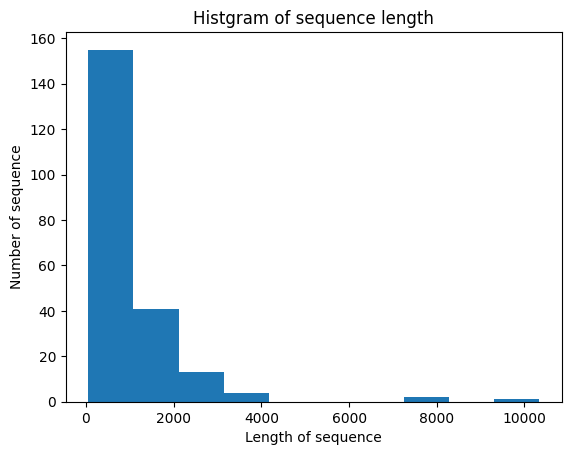

In [2]:
#plot the histgram of sequence length
plt.hist(seqLenAll)
plt.title("Histgram of sequence length")
plt.xlabel("Length of sequence")
plt.ylabel("Number of sequence")
plt.show()

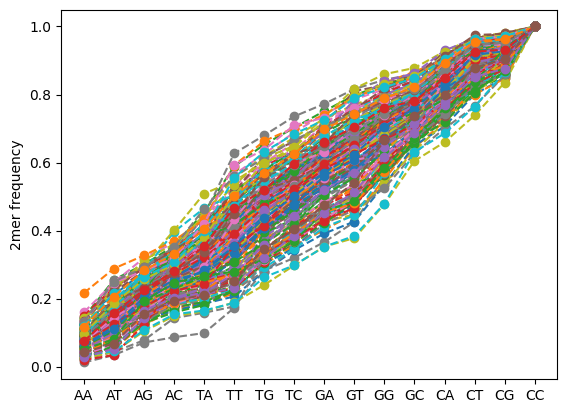

In [3]:
#plot the frequence of 2mers for each sequence
for i in range(len(seqLenAll)):
        plt.plot(range(1,17),cal_ecdf(cal_freq(twoMerFreqAll[(16*i):16*(i+1)])),linestyle='dashed',marker="o")
plt.ylabel("2mer frequency")
plt.xticks(range(1,17),twoMer)
plt.show()